In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import json
import matplotlib.pyplot as plt
from matplotlib import rc

In [8]:
df = pd.read_csv('C:/python/datas/crime in seoul')
df.head()

,지역,발생 합계,검거 합계,살인 발생,살인 검거,강도 발생,강도 검거,강간·강제추행 발생,강간·강제추행 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,소계,80445,58012,124,112,122,116,4911,4446,33531,17950,41757,35388
1,종로구,2712,2755,6,3,4,4,156,757,1079,743,1467,1248
2,중구,2861,2072,6,6,6,6,161,97,1279,739,1409,1224
3,용산구,2381,1659,3,2,1,1,141,103,945,484,1291,1069
4,성동구,2112,1510,3,4,4,1,110,82,905,497,1090,926


In [9]:
df = df.rename(columns={'강간·강제추행 발생': '강간, 강제추행 발생',
                        '강간·강제추행 검거': '강간, 강제추행 검거'})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   지역           26 non-null     object
 1   발생 합계        26 non-null     int64 
 2   검거 합계        26 non-null     int64 
 3   살인 발생        26 non-null     int64 
 4   살인 검거        26 non-null     int64 
 5   강도 발생        26 non-null     int64 
 6   강도 검거        26 non-null     int64 
 7   강간, 강제추행 발생  26 non-null     int64 
 8   강간, 강제추행 검거  26 non-null     int64 
 9   절도 발생        26 non-null     int64 
 10  절도 검거        26 non-null     int64 
 11  폭력 발생        26 non-null     int64 
 12  폭력 검거        26 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 2.8+ KB


In [11]:
df['살인검거율'] = round(df['살인 검거']/df['살인 발생']*100, 2)
df['강도검거율'] = round(df['강도 검거']/df['강도 발생']*100, 2)
df['강간, 강제추행 검거율'] = round(df['강간, 강제추행 검거']/df['강간, 강제추행 발생']*100, 2)
df['절도검거율'] = round(df['절도 검거']/df['절도 발생']*100, 2)
df['폭력검거율'] = round(df['폭력 검거']/df['폭력 발생']*100, 2)

del df['강간, 강제추행 검거']
del df['강도 검거']
del df['살인 검거']
del df['절도 검거']
del df['폭력 검거']

df.head()

,지역,발생 합계,검거 합계,살인 발생,강도 발생,"강간, 강제추행 발생",절도 발생,폭력 발생,살인검거율,강도검거율,"강간, 강제추행 검거율",절도검거율,폭력검거율
0,소계,80445,58012,124,122,4911,33531,41757,90.32,95.08,90.53,53.53,84.75
1,종로구,2712,2755,6,4,156,1079,1467,50.00,100.00,485.26,68.86,85.07
2,중구,2861,2072,6,6,161,1279,1409,100.00,100.00,60.25,57.78,86.87
3,용산구,2381,1659,3,1,141,945,1291,66.67,100.00,73.05,51.22,82.80
4,성동구,2112,1510,3,4,110,905,1090,133.33,25.00,74.55,54.92,84.95


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역            26 non-null     object 
 1   발생 합계         26 non-null     int64  
 2   검거 합계         26 non-null     int64  
 3   살인 발생         26 non-null     int64  
 4   강도 발생         26 non-null     int64  
 5   강간, 강제추행 발생   26 non-null     int64  
 6   절도 발생         26 non-null     int64  
 7   폭력 발생         26 non-null     int64  
 8   살인검거율         26 non-null     float64
 9   강도검거율         26 non-null     float64
 10  강간, 강제추행 검거율  26 non-null     float64
 11  절도검거율         26 non-null     float64
 12  폭력검거율         26 non-null     float64
dtypes: float64(5), int64(7), object(1)
memory usage: 2.8+ KB


In [13]:
df = df.astype({'발생 합계': 'float64', '검거 합계': 'float64', '살인 발생': 'float64', 
           '강도 발생': 'float64', '강간, 강제추행 발생': 'float64', 
           '절도 발생': 'float64', '폭력 발생': 'float64'})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역            26 non-null     object 
 1   발생 합계         26 non-null     float64
 2   검거 합계         26 non-null     float64
 3   살인 발생         26 non-null     float64
 4   강도 발생         26 non-null     float64
 5   강간, 강제추행 발생   26 non-null     float64
 6   절도 발생         26 non-null     float64
 7   폭력 발생         26 non-null     float64
 8   살인검거율         26 non-null     float64
 9   강도검거율         26 non-null     float64
 10  강간, 강제추행 검거율  26 non-null     float64
 11  절도검거율         26 non-null     float64
 12  폭력검거율         26 non-null     float64
dtypes: float64(12), object(1)
memory usage: 2.8+ KB


In [15]:
df.loc[df[df['강도검거율'] > 100].index, '강도검거율']

6     114.29
7     116.67
18    133.33
Name: 강도검거율, dtype: float64

In [16]:
# 값을 변경할 columns을 추려냅니다.
ggr_cols = ['살인검거율', '강도검거율', '강간, 강제추행 검거율', '절도검거율', '폭력검거율']

# 위에서 추려낸 ggr_cols의 각 요소인 컬럼을 하나씩 처리합니다.
for col in ggr_cols:
    # loc로 인덱싱해야 원본 DataFrame의 값을 수정할 수 있어요.
    # loc[행, 열]
    df.loc[df[df[col] > 100].index, col] = 100

In [17]:
df.head()

,지역,발생 합계,검거 합계,살인 발생,강도 발생,"강간, 강제추행 발생",절도 발생,폭력 발생,살인검거율,강도검거율,"강간, 강제추행 검거율",절도검거율,폭력검거율
0,소계,80445.0,58012.0,124.0,122.0,4911.0,33531.0,41757.0,90.32,95.08,90.53,53.53,84.75
1,종로구,2712.0,2755.0,6.0,4.0,156.0,1079.0,1467.0,50.00,100.00,100.00,68.86,85.07
2,중구,2861.0,2072.0,6.0,6.0,161.0,1279.0,1409.0,100.00,100.00,60.25,57.78,86.87
3,용산구,2381.0,1659.0,3.0,1.0,141.0,945.0,1291.0,66.67,100.00,73.05,51.22,82.80
4,성동구,2112.0,1510.0,3.0,4.0,110.0,905.0,1090.0,100.00,25.00,74.55,54.92,84.95


In [18]:
df['검거율'] = df['검거 합계']/df['발생 합계']*100
df.head()

,지역,발생 합계,검거 합계,살인 발생,강도 발생,"강간, 강제추행 발생",절도 발생,폭력 발생,살인검거율,강도검거율,"강간, 강제추행 검거율",절도검거율,폭력검거율,검거율
0,소계,80445.0,58012.0,124.0,122.0,4911.0,33531.0,41757.0,90.32,95.08,90.53,53.53,84.75,72.113867
1,종로구,2712.0,2755.0,6.0,4.0,156.0,1079.0,1467.0,50.00,100.00,100.00,68.86,85.07,101.585546
2,중구,2861.0,2072.0,6.0,6.0,161.0,1279.0,1409.0,100.00,100.00,60.25,57.78,86.87,72.422230
3,용산구,2381.0,1659.0,3.0,1.0,141.0,945.0,1291.0,66.67,100.00,73.05,51.22,82.80,69.676606
4,성동구,2112.0,1510.0,3.0,4.0,110.0,905.0,1090.0,100.00,25.00,74.55,54.92,84.95,71.496212


In [19]:
df.rename(columns = {'살인 발생': '살인', 
                     '강도 발생': '강도',
                     '강간, 강제추행 발생': '강간, 강제추행',
                     '절도 발생': '절도',
                     '폭력 발생': '폭력'}, inplace=True)
del df['발생 합계']
del df['검거 합계']

df = df.drop([0])
df.head()

,지역,살인,강도,"강간, 강제추행",절도,폭력,살인검거율,강도검거율,"강간, 강제추행 검거율",절도검거율,폭력검거율,검거율
1,종로구,6.0,4.0,156.0,1079.0,1467.0,50.00,100.0,100.00,68.86,85.07,101.585546
2,중구,6.0,6.0,161.0,1279.0,1409.0,100.00,100.0,60.25,57.78,86.87,72.422230
3,용산구,3.0,1.0,141.0,945.0,1291.0,66.67,100.0,73.05,51.22,82.80,69.676606
4,성동구,3.0,4.0,110.0,905.0,1090.0,100.00,25.0,74.55,54.92,84.95,71.496212
5,광진구,5.0,4.0,208.0,1414.0,1456.0,60.00,100.0,77.40,53.32,87.91,71.331390


In [20]:
target_col = ['살인', '강도', '강간, 강제추행', '절도', '폭력']
weight_col = df[target_col].max()

crime_count_norm = df[target_col]/weight_col
crime_count_norm.head()

,살인,강도,"강간, 강제추행",절도,폭력
1,0.500000,0.16,0.269896,0.454890,0.464387
2,0.500000,0.24,0.278547,0.539207,0.446027
3,0.250000,0.04,0.243945,0.398398,0.408674
4,0.250000,0.16,0.190311,0.381535,0.345046
5,0.416667,0.16,0.359862,0.596121,0.460905


In [25]:
import matplotlib as mpl

In [26]:
font_dir = ['C:/python/fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    mpl.font_manager.fontManager.addfont(font)
    # print(mpl.font_manager.FontProperties(fname=font).get_name())

In [27]:
mpl.rcParams['font.family'] = 'NanumBarunGothicOTF'
print(mpl.rcParams['font.family'])

['NanumBarunGothicOTF']


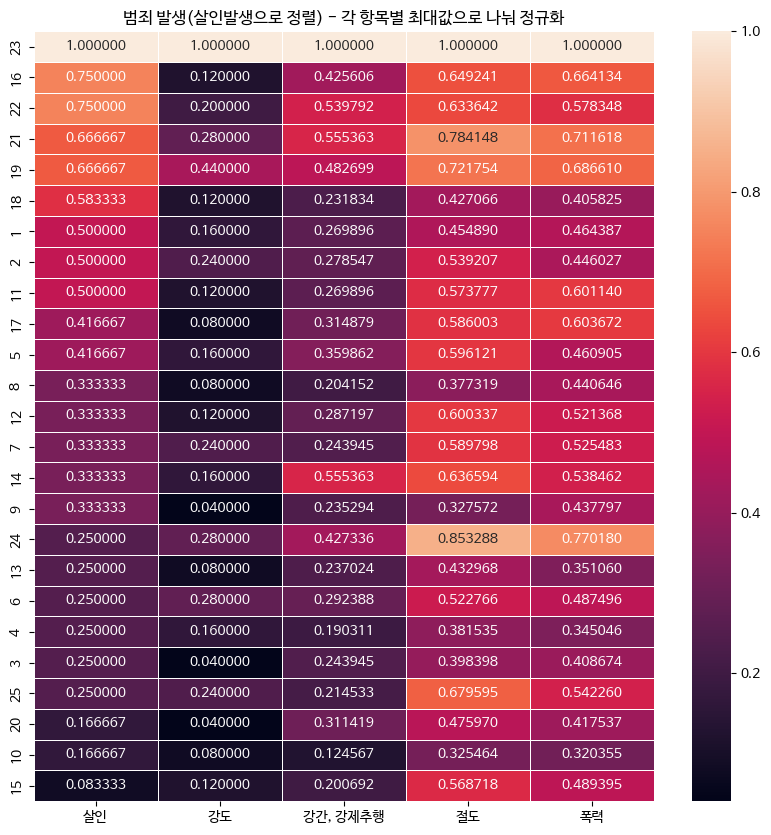

In [28]:
plt.figure(figsize = (10,10))
sns.heatmap(crime_count_norm.sort_values(by='살인', ascending=False), annot=True, fmt='f', linewidths=.5)
plt.title('범죄 발생(살인발생으로 정렬) - 각 항목별 최대값으로 나눠 정규화')
plt.show()